In [1]:
import os
os.environ["TRANSFORMERS_NO_TF"] = "1"


In [2]:
pip install transformers datasets scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip uninstall keras tensorflow tf-keras -y


Found existing installation: keras 3.9.2
Uninstalling keras-3.9.2:
  Successfully uninstalled keras-3.9.2
Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
os.environ["TRANSFORMERS_NO_TF"] = "1"


In [6]:
import transformers
print("✅ Transformers version:", transformers.__version__)


✅ Transformers version: 4.51.3


In [7]:
pip install hf_xet


Note: you may need to restart the kernel to use updated packages.


In [8]:
import transformers
print(transformers.__version__)


4.51.3


In [9]:
pip install accelerate>=0.26.0


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install transformers[torch]

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tensorflow


  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)


In [21]:
import os
import pandas as pd

# ✅ Set the correct path to your CSV
data_path = r"C:\Users\leopa\Desktop\Detection-of-Social-Bots-using-Machine-Learning-main\processed\cleaned_df.csv"

# ✅ Load CSV with safe dtype handling
df = pd.read_csv(data_path, low_memory=False)

# ✅ Verify and rename columns
if "clean_tweet" in df.columns and "label" in df.columns:
    df = df[["clean_tweet", "label"]].dropna()
    df.rename(columns={"clean_tweet": "text"}, inplace=True)
    print("✅ Cleaned and renamed for BERT input. Shape:", df.shape)
    print(df.head())
else:
    print("❌ Required columns 'clean_tweet' and 'label' not found. Please check the CSV.")


✅ Cleaned and renamed for BERT input. Shape: (2027886, 2)
                                                text  label
0  think going interesting marvel handle year rec...      0
1  vedere lorario sul telefono due volta perchã l...      1
2         never repent eaten little thomas jefferson      1
3  quando la fortuna ã cieca tu sulla fronte hai ...      1
4                                                 rt      0


In [46]:
!pip install transformers datasets


In [44]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [48]:
pip install transformers datasets scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))


PyTorch version: 2.6.0+cu126
CUDA available: True
GPU: NVIDIA GeForce GTX 1660 Ti


In [7]:
pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


✅ Loading saved tokenized dataset...
🔹 Train size: 1825097
🔹 Validation size: 202789


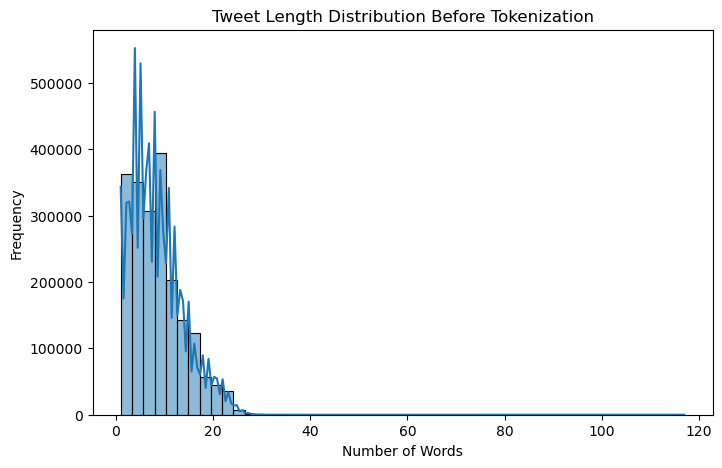

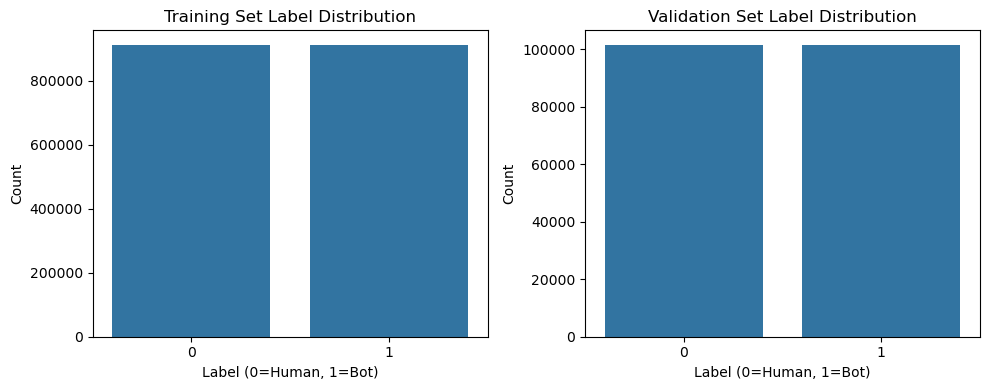

In [7]:
import os
import pandas as pd
from datasets import Dataset, DatasetDict, load_from_disk
from transformers import BertTokenizerFast
import seaborn as sns
import matplotlib.pyplot as plt
# ✅ Paths
base_path = os.path.expanduser("~/Desktop/Detection-of-Social-Bots-using-Machine-Learning-main/")
data_path = os.path.join(base_path, "processed", "cleaned_df.csv")
tokenized_path = os.path.join(base_path, "processed", "bert_tokenized_dataset")

# ✅ Check if tokenized dataset is already saved
if os.path.exists(tokenized_path):
    print("✅ Loading saved tokenized dataset...")
    dataset = load_from_disk(tokenized_path)

else:
    print("🚀 Loading and splitting cleaned data...")
    df = pd.read_csv(data_path)
    df = df.rename(columns={"clean_tweet": "text"})  # Standard BERT input name
    df = df[["text", "label"]].dropna()
    
    # ✅ Shuffle and split (90% train, 10% validation)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    split_index = int(len(df) * 0.9)
    train_df = df.iloc[:split_index].copy()
    val_df   = df.iloc[split_index:].copy()
    
    # ✅ Create HuggingFace Datasets
    train_dataset = Dataset.from_pandas(train_df)
    val_dataset = Dataset.from_pandas(val_df)
    
    dataset = DatasetDict({
        "train": train_dataset,
        "validation": val_dataset
    })
    
    # ✅ Load tokenizer
    tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
    
    # ✅ Tokenization function
    def tokenize(batch):
        return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)
    
    # ✅ Apply tokenization
    print("🚀 Tokenizing dataset...")
    dataset = dataset.map(tokenize, batched=True, remove_columns=["text"])
    
    # ✅ Save tokenized dataset
    dataset.save_to_disk(tokenized_path)
    print(f"✅ Tokenized dataset saved at: {tokenized_path}")

# ✅ Final check
print("🔹 Train size:", len(dataset["train"]))
print("🔹 Validation size:", len(dataset["validation"]))
# ✅ Always reload raw DataFrame for plotting
df_plot = pd.read_csv(data_path)
df_plot = df_plot[["clean_tweet", "label"]].dropna()
df_plot = df_plot.rename(columns={"clean_tweet": "text"})

# -------------------------------
# ✅ 1. Plot Tweet Length Distribution
# -------------------------------
df_plot["text_length"] = df_plot["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(data=df_plot, x="text_length", bins=50, kde=True)
plt.title('Tweet Length Distribution Before Tokenization')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# -------------------------------
# ✅ 2. Class Distribution (Train vs Validation Split)
# -------------------------------
split_index = int(len(df_plot) * 0.9)
train_labels = df_plot.iloc[:split_index]["label"]
val_labels = df_plot.iloc[split_index:]["label"]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x=train_labels)
plt.title('Training Set Label Distribution')
plt.xlabel('Label (0=Human, 1=Bot)')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(x=val_labels)
plt.title('Validation Set Label Distribution')
plt.xlabel('Label (0=Human, 1=Bot)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [13]:
pip install transformers datasets scikit-learn torch


In [ ]:
import os
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from tqdm import tqdm

# ✅ Constants
BASE_DIR = r"C:\Users\leopa\Desktop\Detection-of-Social-Bots-using-Machine-Learning-main"
MODEL_PATH = os.path.join(BASE_DIR, "models", "bert_model.pt")
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Load dataset
df = pd.read_csv(os.path.join(BASE_DIR, "processed", "cleaned_df.csv"))
df = df[["clean_tweet", "label"]].dropna().rename(columns={"clean_tweet": "text"})

# ✅ Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# ✅ Dataset Class
class TweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        inputs = self.tokenizer.encode_plus(
            text, add_special_tokens=True, max_length=self.max_len,
            padding="max_length", truncation=True, return_tensors="pt"
        )

        return {
            "input_ids": inputs["input_ids"].squeeze(),
            "attention_mask": inputs["attention_mask"].squeeze(),
            "label": torch.tensor(label, dtype=torch.long)
        }

    def __len__(self):
        return len(self.labels)

# ✅ Prepare dataset and dataloaders
dataset = TweetDataset(df["text"].tolist(), df["label"].tolist(), tokenizer)

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=16, shuffle=True)
val_loader = DataLoader(val_set, batch_size=16)

# ✅ Load or initialize model
if os.path.exists(MODEL_PATH):
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
    model.load_state_dict(torch.load(MODEL_PATH))
    print("✅ Loaded saved model.")
else:
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
    print("🚀 Training from scratch.")

model.to(DEVICE)

# ✅ Optimizer and loss
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# ✅ Training loop
EPOCHS = 3
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(DEVICE)
        attention_mask = batch["attention_mask"].to(DEVICE)
        labels = batch["label"].to(DEVICE)

        outputs = model(input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"🧪 Epoch {epoch+1} Loss: {total_loss:.4f}")
    torch.save(model.state_dict(), MODEL_PATH)
    print(f"💾 Model saved at: {MODEL_PATH}")

# ✅ Evaluation
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(DEVICE)
        attention_mask = batch["attention_mask"].to(DEVICE)
        labels = batch["label"].to(DEVICE)

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

# ✅ Metrics
print("\n📊 Final Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🚀 Training from scratch.


Epoch 1/3: 100%|██████████| 114069/114069 [12:58:34<00:00,  2.44it/s]  


🧪 Epoch 1 Loss: 15472.4260
💾 Model saved at: C:\Users\leopa\Desktop\Detection-of-Social-Bots-using-Machine-Learning-main\models\bert_model.pt


Epoch 2/3: 100%|██████████| 114069/114069 [12:53:25<00:00,  2.46it/s]  


🧪 Epoch 2 Loss: 12869.9063
💾 Model saved at: C:\Users\leopa\Desktop\Detection-of-Social-Bots-using-Machine-Learning-main\models\bert_model.pt


Epoch 3/3: 100%|██████████| 114069/114069 [13:19:44<00:00,  2.38it/s]  


🧪 Epoch 3 Loss: 11509.7357
💾 Model saved at: C:\Users\leopa\Desktop\Detection-of-Social-Bots-using-Machine-Learning-main\models\bert_model.pt


In [15]:
import os
import torch
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification
from datasets import load_from_disk
from torch.utils.data import DataLoader

# ✅ Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Load model
model_dir = "C:/Users/leopa/Desktop/Detection-of-Social-Bots-using-Machine-Learning-main/models/bert_model.pt"
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.load_state_dict(torch.load(model_dir, map_location=device))
model = model.to(device)
model.eval()
print("✅ BERT Model Loaded!")

# ✅ Load tokenized validation dataset
val_dataset = load_from_disk("C:/Users/leopa/Desktop/Detection-of-Social-Bots-using-Machine-Learning-main/processed/bert_tokenized_dataset/validation")

# Fix: Use the correct column name 'label' instead of 'labels'
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])  # Changed 'labels' to 'label'
val_dataloader = DataLoader(val_dataset, batch_size=32)

# ✅ Evaluate
all_preds = []
all_labels = []

print("🚀 Evaluating BERT...")

for batch in tqdm(val_dataloader):
    # Move batch to device
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['label'].to(device)  # Changed 'labels' to 'label'

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, axis=1)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# ✅ Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print("\n✅ BERT Evaluation Results:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ BERT Model Loaded!
🚀 Evaluating BERT...


100%|██████████| 6338/6338 [56:53<00:00,  1.86it/s]  



✅ BERT Evaluation Results:
Accuracy:  0.9722
Precision: 0.9937
Recall:    0.9504
F1-Score:  0.9716


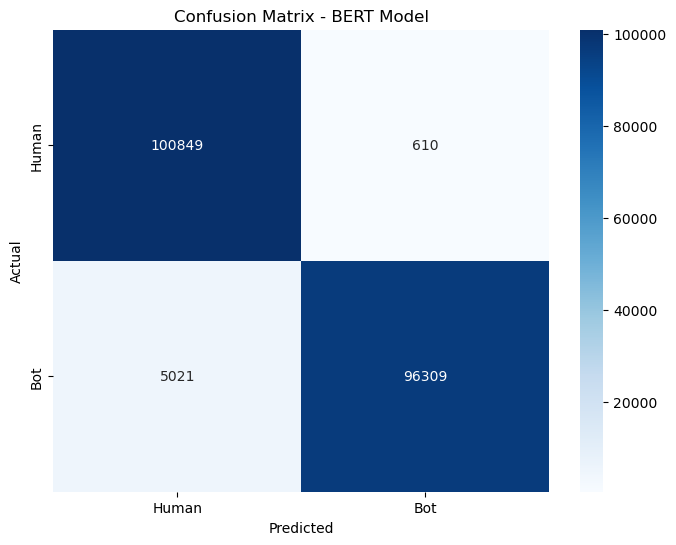

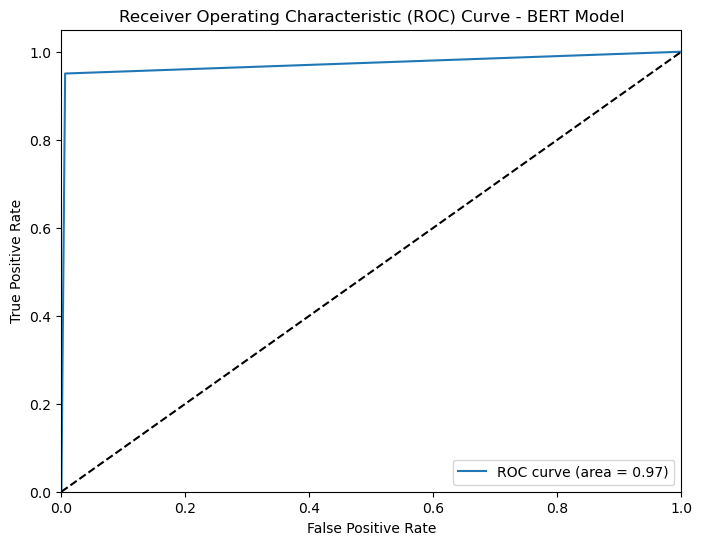


✅ Evaluation Results Saved: C:\Users\leopa/Desktop/Detection-of-Social-Bots-using-Machine-Learning-main/processed\bert_evaluation_results.csv


In [17]:
# ✅ Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pandas as pd

# ✅ Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Human", "Bot"], yticklabels=["Human", "Bot"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - BERT Model')
plt.show()

# ✅ ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - BERT Model')
plt.legend(loc="lower right")
plt.show()

# ✅ Save Results
results = {
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1-Score": [f1]
}

results_df = pd.DataFrame(results)
results_path = os.path.join(base_path, "processed", "bert_evaluation_results.csv")
results_df.to_csv(results_path, index=False)

print(f"\n✅ Evaluation Results Saved: {results_path}")


In [1]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# ✅ Load the fine-tuned BERT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_path = "C:/Users/leopa/Desktop/Detection-of-Social-Bots-using-Machine-Learning-main/models/bert_model.pt"
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

# ✅ Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# ✅ Define a prediction function
def predict_tweet(text):
    # Preprocess the tweet
    inputs = tokenizer(
        text,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    
    inputs = {key: val.to(device) for key, val in inputs.items()}
    
    # Predict
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=1).item()

    # Interpret prediction
    if prediction == 1:
        print("🤖 This tweet is likely from a BOT!")
    else:
        print("🧑‍💻 This tweet is likely from a HUMAN!")

# ✅ Example usage:
tweet = "EARN MONEY FAST! CLICK LINK IN BIO!!!"
predict_tweet(tweet)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🧑‍💻 This tweet is likely from a HUMAN!


In [3]:
import os
import torch
import numpy as np
from tensorflow.keras.models import load_model
from transformers import BertTokenizer, BertForSequenceClassification

# ✅ Paths
base_path = "C:/Users/leopa/Desktop/Detection-of-Social-Bots-using-Machine-Learning-main/"
model_dir = os.path.join(base_path, "models")
processed_dir = os.path.join(base_path, "processed")

# ✅ Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Load BERT model
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
bert_model.load_state_dict(torch.load(os.path.join(model_dir, "bert_model.pt"), map_location=device))
bert_model = bert_model.to(device)
bert_model.eval()

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# ✅ Load LSTM model
lstm_model = load_model(os.path.join(processed_dir, "lstm_model.h5"))

# ✅ Load TF-IDF vectorizer
import joblib
tfidf = joblib.load(os.path.join(processed_dir, "tfidf_vectorizer.pkl"))

# ✅ Text Preprocessing (basic cleaning)
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    return text.strip()

# ✅ Predict function
def predict_tweet_ensemble(tweet):
    tweet_clean = clean_text(tweet)

    # --- BERT Prediction ---
    bert_inputs = bert_tokenizer(tweet_clean, return_tensors='pt', truncation=True, padding='max_length', max_length=50)
    bert_inputs = {key: val.to(device) for key, val in bert_inputs.items()}

    with torch.no_grad():
        bert_outputs = bert_model(**bert_inputs)
        bert_probs = torch.softmax(bert_outputs.logits, dim=1)
        bert_bot_prob = bert_probs[:, 1].item()

    # --- LSTM Prediction ---
    tfidf_features = tfidf.transform([tweet_clean]).toarray()
    lstm_probs = lstm_model.predict(tfidf_features)
    lstm_bot_prob = lstm_probs[0][0]  # Assuming output shape (batch_size, 1)

    # --- Ensemble Prediction ---
    final_prob = (bert_bot_prob + lstm_bot_prob) / 2

    print("\n🔍 Results:")
    print(f"BERT bot probability: {bert_bot_prob:.4f}")
    print(f"LSTM bot probability: {lstm_bot_prob:.4f}")
    print(f"Ensembled bot probability: {final_prob:.4f}")

    if final_prob >= 0.5:
        print("🤖 Prediction: **Bot**")
    else:
        print("🧑‍💻 Prediction: **Human**")

# ✅ Example usage
predict_tweet_ensemble("Buy followers and likes now! Best prices online!")
predict_tweet_ensemble("Having a great day with friends at the beach!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step

🔍 Results:
BERT bot probability: 0.8700
LSTM bot probability: 0.1214
Ensembled bot probability: 0.4957
🧑‍💻 Prediction: **Human**
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

🔍 Results:
BERT bot probability: 0.1172
LSTM bot probability: 0.1214
Ensembled bot probability: 0.1193
🧑‍💻 Prediction: **Human**
